<a href="https://colab.research.google.com/github/DaisyIpatzi/daisyipatzi.github.io/blob/main/assets/ML_Artifacts/Linear_Regression_with_Scikit_Learn/World_Population_VS_GDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Loading data and libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Load the datasets from CSV files
gdp_data  = pd.read_csv('/content/drive/My Drive/Essex/Module_ML/Unit_4_Files/Global_GDP.csv' ) # Replace with the actual path
population_data =  pd.read_csv('/content/drive/My Drive/Essex/Module_ML/Unit_4_Files/Global_Population.csv')  # Replace with the actual path

In [9]:
gdp_data.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.549721e+09,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,1.929944e+10,1.970954e+10,2.147872e+10,2.571501e+10,2.351080e+10,2.679160e+10,...,9.427110e+11,9.498490e+11,9.635600e+11,9.837490e+11,9.186470e+11,8.720230e+11,9.842560e+11,1.011720e+12,1.008380e+12,9.188150e+11
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,...,6.709630e+11,7.275710e+11,8.207880e+11,8.514870e+11,7.607300e+11,6.905430e+11,6.837420e+11,7.416920e+11,7.945720e+11,7.845880e+11
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.117900e+11,1.280530e+11,1.367100e+11,1.457120e+11,1.161940e+11,1.011240e+11,1.221240e+11,1.013530e+11,8.941719e+10,5.837598e+10


In [10]:
population_data.head(5)

,Country Name,Country Code,Series Name,Series Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211,55438,56225,56695,57032,57360,...,102560,103159,103774,104341,104872,105366,105845,106314,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967,9169406,9351442,9543200,9744772,9956318,...,31161378,32269592,33370804,34413603,35383028,36296111,37171922,38041757,38928341,39835000
2,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765,134159786,137614644,141202036,144920186,148769974,...,547482863,562601578,578075373,593871847,609978946,626392880,643090131,660046272,677243299,694664000
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419,98407221,100506960,102691339,104953470,107289875,...,370243017,380437896,390882979,401586651,412551299,423769930,435229381,446911598,458803476,470898000
4,Albania,ALB,"Population, total",SP.POP.TOTL,1608800,1659800,1711319,1762621,1814135,1864791,...,2900401,2895092,2889104,2880703,2876101,2873457,2866376,2854191,2837743,2832000


# Task A: Correlation Analysis

Pre-process the data – mean population of each country and mean per capita GDP (from 2001 to 2021) by making some arrangements for the missing values (HINT: You will need to use the datasets Global_GDP.csv and Global_Population.csv). Investigate any correlation between the mean population of each country and the mean per capita GDP (from 2001 to 2021). Very briefly, interpret the generated plot. Evaluate the Pearson Correlation Coefficient.

<ipython-input-14-f940a234ac08>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_data_selected[year] = pd.to_numeric(population_data_selected[year], errors='coerce')
<ipython-input-14-f940a234ac08>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_data_selected[year].fillna(population_data_selected[year].mean(), inplace=True)
<ipython-input-14-f940a234ac08>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

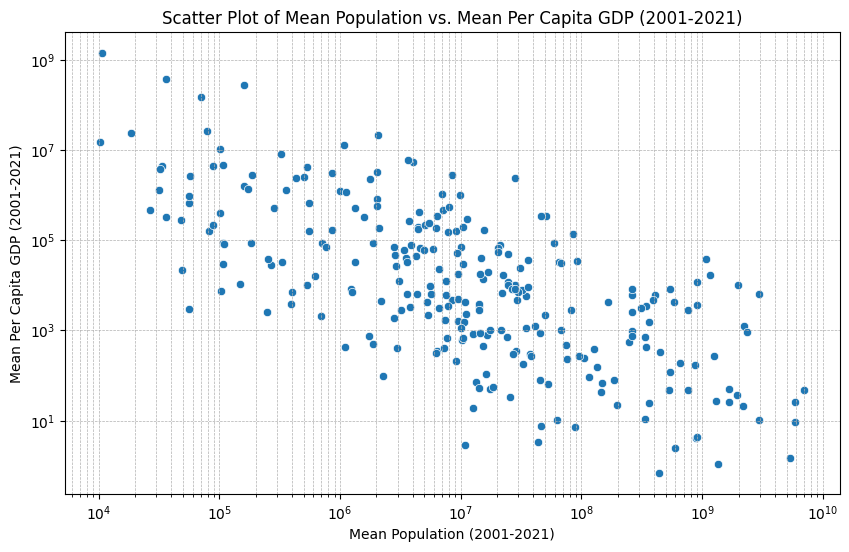

Pearson Correlation Coefficient: -0.03077513030008134


In [14]:
# Selecting the years 2001 to 2021 for population and 2001 to 2020 for GDP
years_population = [str(year) for year in range(2001, 2022)]
years_gdp = [str(year) for year in range(2001, 2021)]

# Selecting relevant columns
population_data_selected = population_data[['Country Name'] + years_population]
gdp_data_selected = gdp_data[['Country Name'] + years_gdp]

# Converting data to numeric and imputing missing values with the mean for each country
for year in years_population:
    population_data_selected[year] = pd.to_numeric(population_data_selected[year], errors='coerce')
    population_data_selected[year].fillna(population_data_selected[year].mean(), inplace=True)

for year in years_gdp:
    gdp_data_selected[year] = pd.to_numeric(gdp_data_selected[year], errors='coerce')
    gdp_data_selected[year].fillna(gdp_data_selected[year].mean(), inplace=True)

# Calculating mean population and GDP
mean_population = population_data_selected[years_population].mean(axis=1)
mean_gdp = gdp_data_selected[years_gdp].mean(axis=1)

# Calculating mean per capita GDP
mean_per_capita_gdp = mean_gdp / mean_population

# Creating a DataFrame with mean values
mean_data_imputed = pd.DataFrame({
    'Country Name': population_data_selected['Country Name'],
    'Mean Population': mean_population,
    'Mean Per Capita GDP': mean_per_capita_gdp
})

# Dropping rows with NaN values (if any remain)
mean_data_imputed.dropna(subset=['Mean Population', 'Mean Per Capita GDP'], inplace=True)

# Plotting and calculating Pearson Correlation Coefficient
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mean_data_imputed, x='Mean Population', y='Mean Per Capita GDP')
plt.xlabel('Mean Population (2001-2021)')
plt.ylabel('Mean Per Capita GDP (2001-2021)')
plt.title('Scatter Plot of Mean Population vs. Mean Per Capita GDP (2001-2021)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

correlation_imputed = np.corrcoef(mean_data_imputed['Mean Population'], mean_data_imputed['Mean Per Capita GDP'])[0, 1]
print("Pearson Correlation Coefficient:", correlation_imputed)


**Interpretation**: The scatter plot visualizes the relationship between the mean population and mean per capita GDP of countries from 2001 to 2021, with both axes on a logarithmic scale to accommodate the wide range of values.

The Pearson Correlation Coefficient for this relationship is approximately -0.031. This value, being close to zero, indicates a very weak negative linear relationship between the mean population and the mean per capita GDP. In simpler terms, there is little to no strong linear correlation between the size of a country's population and its average per capita GDP based on this data. This suggests that other factors, possibly not captured in this analysis, play a more significant role in determining a country's per capita GDP.

# Task B: Regression

Perform linear regression, where the independent variable is the mean population of each country (from 2001 to 2021) and dependent variable is mean per capita GDP (from 2001 to 2021).

<ipython-input-17-fefcc1273524>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_data_selected[year] = pd.to_numeric(population_data_selected[year], errors='coerce')
<ipython-input-17-fefcc1273524>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_data_selected[year].fillna(population_data_selected[year].mean(), inplace=True)
<ipython-input-17-fefcc1273524>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

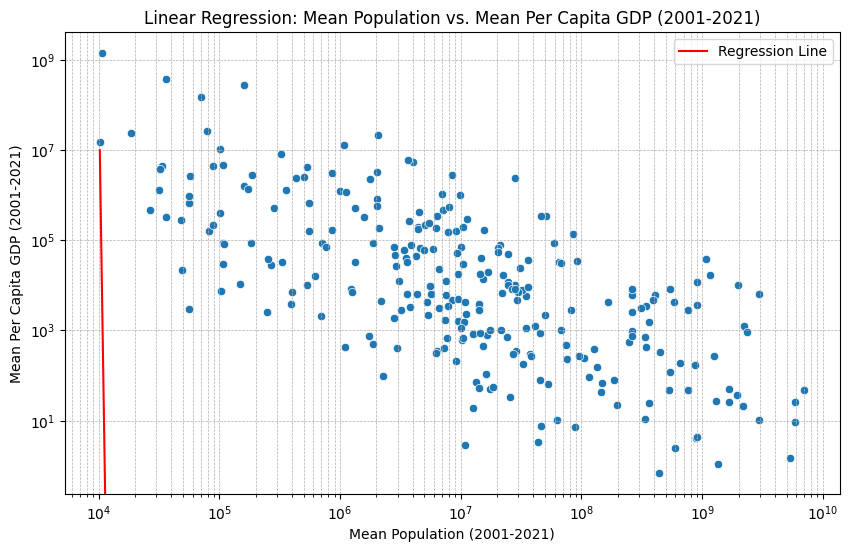

In [17]:
# Selecting the years 2001 to 2021 for population and 2001 to 2020 for GDP
years_population = [str(year) for year in range(2001, 2022)]
years_gdp = [str(year) for year in range(2001, 2021)]

# Selecting relevant columns
population_data_selected = population_data[['Country Name'] + years_population]
gdp_data_selected = gdp_data[['Country Name'] + years_gdp]

# Converting data to numeric and imputing missing values with the mean for each country
for year in years_population:
    population_data_selected[year] = pd.to_numeric(population_data_selected[year], errors='coerce')
    population_data_selected[year].fillna(population_data_selected[year].mean(), inplace=True)

for year in years_gdp:
    gdp_data_selected[year] = pd.to_numeric(gdp_data_selected[year], errors='coerce')
    gdp_data_selected[year].fillna(gdp_data_selected[year].mean(), inplace=True)

# Calculating mean population and GDP
mean_population = population_data_selected[years_population].mean(axis=1)
mean_gdp = gdp_data_selected[years_gdp].mean(axis=1)

# Calculating mean per capita GDP
mean_per_capita_gdp = mean_gdp / mean_population

# Creating a DataFrame with mean values
mean_data_imputed = pd.DataFrame({
    'Country Name': population_data_selected['Country Name'],
    'Mean Population': mean_population,
    'Mean Per Capita GDP': mean_per_capita_gdp
})

# Dropping rows with NaN values (if any remain)
mean_data_imputed.dropna(subset=['Mean Population', 'Mean Per Capita GDP'], inplace=True)

# Preparing data for linear regression
X = mean_data_imputed['Mean Population'].values.reshape(-1, 1)  # Independent variable (mean population)
y = mean_data_imputed['Mean Per Capita GDP'].values.reshape(-1, 1)  # Dependent variable (mean per capita GDP)

# Creating and fitting the linear regression model
linear_model = LinearRegression()
linear_model.fit(X, y)

# Coefficients of the linear regression model
intercept = linear_model.intercept_[0]
slope = linear_model.coef_[0][0]

# Plotting the scatter plot with the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mean_data_imputed, x='Mean Population', y='Mean Per Capita GDP')

# Adding the regression line
x_values = np.array([mean_data_imputed['Mean Population'].min(), mean_data_imputed['Mean Population'].max()])
y_values = intercept + slope * x_values
plt.plot(x_values, y_values, color='red', label='Regression Line')

# Adjusting plot details
plt.xlabel('Mean Population (2001-2021)')
plt.ylabel('Mean Per Capita GDP (2001-2021)')
plt.title('Linear Regression: Mean Population vs. Mean Per Capita GDP (2001-2021)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.legend()
plt.show()


**Interpretation**: This plot illustrates the relationship between the mean population and mean per capita GDP of countries from 2001 to 2021:

The red line represents the linear regression model we fitted.
Each point in the plot represents a country, with its mean population from 2001 to 2021 on the x-axis and its mean per capita GDP over the same period on the y-axis.
As indicated by the regression line, there is a slight negative trend, suggesting that the mean per capita GDP tends to decrease as the mean population increases. However, as previously noted, this relationship is very weak, as reflected by the low slope and the weak correlation coefficient.

This visualization, along with the correlation analysis, indicates that while there is a slight negative linear relationship between these two variables, the mean population size is not a strong predictor of the mean per capita GDP for these countries. Other factors not included in this analysis are likely more influential in determining a country's per capita GDP.